<h1> Machine learning Assignment 2</h1>

<h3>
By Famba Abdulnassiir Siraji <br>
        
Reg No: Jan22/Comp/1195u
    
Course Unit: J22.CS 507 Machine Learning
    
</h3>

<h4> Use the data set of Covid-19 Pandemic in Africa extracted from WHO website on 22nd January 2021 </h4>

<h2> Models to predict Number of covid-19 Death in Africa </h2>

<h4> Import Libralies </h4>

In [1]:
! pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [3]:
#Import the files, Africa_Covid.csv
africaData = pd.read_csv("./Data/Africa_Covid.csv",encoding= 'unicode_escape')

<h3> View first 5 records </h3>

In [4]:
africaData.head()

,Name,Cases_cumulative tota,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total
0,South Africa,1369426,91123,12710,38854
1,Ethiopia,132034,2589,307,2044
2,Nigeria,114691,10692,1386,1478
3,Algeria,104606,1965,265,2854
4,Kenya,99444,889,136,1736


<h3> View Last 5 records </h3>

In [5]:
africaData.tail()

,Name,Cases_cumulative tota,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total
45,Sao Tome and Principe,1170,65,19,17
46,Seychelles,844,234,82,3
47,Mauritius,556,10,0,10
48,United Republic of Tanzania,509,0,0,21
49,Saint Helena,0,0,0,0


<h3> Check the shape </h3>

In [6]:
africaData.shape

(50, 5)

<h3> Normalise the data and perform calculations of the statistical data </h3>

In [7]:
africaData.describe()

,Cases_cumulative tota,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total
count,5.000000e+01,50.000000,50.000000,50.000000
mean,4.790520e+04,3157.600000,444.460000,1112.880000
std,1.930793e+05,12891.920436,1802.809873,5474.797223
min,0.000000e+00,0.000000,0.000000,0.000000
25%,3.627000e+03,171.250000,5.250000,63.000000
50%,9.852000e+03,567.500000,66.000000,119.000000
75%,2.510825e+04,1753.750000,241.000000,391.000000
max,1.369426e+06,91123.000000,12710.000000,38854.000000


In [8]:
print("a. Maximum Deaths _cumulative total is 38854.000000")
print("b. Minimum Deaths _cumulative total is 0.000000")
print("c. Mean Deaths _cumulative total is 1112.880000")
print("d. Standard deviation Case cumulative total 1.930793e+05")

a. Maximum Deaths _cumulative total is 38854.000000
b. Minimum Deaths _cumulative total is 0.000000
c. Mean Deaths _cumulative total is 1112.880000
d. Standard deviation Case cumulative total 1.930793e+05


<b>Develop simple linear regression model to predict the Deaths _cumulative total using Cases cumulative total feature </b>

<h3> Simple Linear Regression Model </h3>

In [9]:
#import libraries we are to use please note other libraries are already imported at the start
from sklearn.linear_model import LinearRegression 
%matplotlib inline

In [10]:
X = africaData[['Cases_cumulative tota']] 
Y = africaData['Deaths _cumulative total'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
lm.score(X, Y)

0.9940894194551632

<h3> Use the identified cases to predict deaths </h3>

In [11]:
X = africaData[['Cases_cumulative tota']] 
Y = africaData['Deaths _cumulative total'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:7]

array([38473.93267013,  3491.30683057,  3000.99844007,  2715.88282465,
        2569.94660187,  1421.51164605,   916.21948994])

In [12]:
print(f"The intercep value is {lm.intercept_} ")

The intercep value is -241.46016655149083 


In [13]:
print(f"The slope value is {lm.coef_} ")

The slope value is [0.02827126] 


In [14]:
#calculate MSE

from sklearn.metrics import mean_squared_error
Yhat=lm.predict(X)
mse = mean_squared_error(africaData['Deaths _cumulative total'] , Yhat)
print('The mean square error of  Deaths and predicted value is: ', mse)

The mean square error of  Deaths and predicted value is:  173617.0178716948


In [15]:
#find the R^2
print(f'The R-squared is:{lm.score(X,Y)}')

The R-squared is:0.9940894194551632


<h4> ~99.0% of The cumulative Deaths of the covid-19 is expalianed by this simple linear model Cases_cumulative total fit
</h4>

 <h3>Plot showing correlation between Cases_cumulative total and Deaths _cumulative total </h3>

                          Cases_cumulative tota  Deaths _cumulative total
Cases_cumulative tota                   1.00000                   0.99704
Deaths _cumulative total                0.99704                   1.00000


<AxesSubplot:xlabel='Cases_cumulative tota', ylabel='Deaths _cumulative total'>

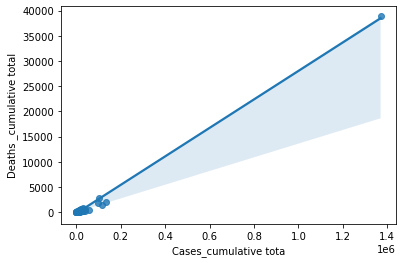

In [16]:
print(africaData[["Cases_cumulative tota", "Deaths _cumulative total"]].corr())
sns.regplot(x="Cases_cumulative tota", y="Deaths _cumulative total", data=africaData)

<b>Develop Multiple Linear Regression Model to predict the Deaths _cumulative total using Cases cumulative total, Cases _newly reported in last 7 days and Cases _newly reported in last 24 hours features</b>

<h3> Multiple Linear Regression </h3>

In [17]:
Z = africaData[['Cases_cumulative tota', 'Cases _newly reported in last 7 days', 'Cases _newly reported in last 24 hours']]

In [18]:
lm.fit(Z, africaData['Deaths _cumulative total'])

LinearRegression()

In [19]:
print(f"The intercept Value is {lm.intercept_}")

The intercept Value is -241.082518012126


In [20]:
print(f"The Coeficient is {lm.coef_}")

The Coeficient is [ 0.02511273  0.06107889 -0.09434027]


<h4>Finds the R-squared (R2 ) </h4>

In [21]:
lm.fit(Z, africaData['Deaths _cumulative total'])
print('The R-square is: ', lm.score(Z, africaData['Deaths _cumulative total']))

The R-square is:  0.994408487167322


<b> ~ 99.0 % of the variation of Deaths _cumulative total is explained by this multiple linear regression "multi_fit".</b>

<h4>Finds the mean square error (MSE) </h4>

In [22]:
Y_predict_multifit = lm.predict(Z)

In [23]:
print('The mean square error of Deaths_cumulative total and predicted value using multifit is: ', \
      mean_squared_error(africaData['Deaths _cumulative total'], Y_predict_multifit))

The mean square error of Deaths_cumulative total and predicted value using multifit is:  164244.74314099274


<h3> Decission Tree </h3>

<h4> Install libraries </h4>

In [24]:
!pip install six

In [25]:
!pip install pydotplus

In [26]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO

<b>Use Decision Tree classifier to predict the most serious transmission mode and evaluate the model using F1-score</>

<h3> Build and empty Decission Tree object with depth 5 </h3>

In [27]:
from sklearn.externals.six import StringIO
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as mpimg

In [28]:
africaData = pd.read_csv("./Data/Africa_Covid.csv",encoding= 'unicode_escape')

In [29]:
TransmissionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
TransmissionTree 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler
X_initial = X
from sklearn.preprocessing import StandardScaler 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[6.91393516],
       [0.44014522],
       [0.34941008],
       [0.29664736],
       [0.2696408 ]])

<h3> Train the Decision Tree Using the global X dataSet </h3>

In [31]:
TransmissionTree.fit(X_initial, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

<h3> Show the Decision Tree </h3>

<h3> Data given does not contain Transmission Mode as per the Question </h3>

<h3> K Nearest Neighbor(KNN) </h3>

array([[<AxesSubplot:title={'center':'Deaths _cumulative total'}>]],
      dtype=object)

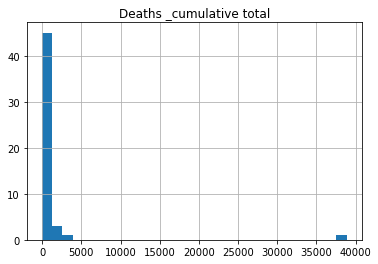

In [34]:
africaData.hist(column = 'Deaths _cumulative total', bins = 30)

<h3> Feature set </h3>

In [47]:
africaData.columns

Index(['Name', 'Cases_cumulative tota', 'Cases _newly reported in last 7 days',
       'Cases _newly reported in last 24 hours', 'Deaths _cumulative total'],
      dtype='object')

In [48]:
X = africaData[['Name', 'Cases_cumulative tota', 'Cases _newly reported in last 7 days',
       'Cases _newly reported in last 24 hours', 'Deaths _cumulative total']]
X[0:5]

,Name,Cases_cumulative tota,Cases _newly reported in last 7 days,Cases _newly reported in last 24 hours,Deaths _cumulative total
0,South Africa,1369426,91123,12710,38854
1,Ethiopia,132034,2589,307,2044
2,Nigeria,114691,10692,1386,1478
3,Algeria,104606,1965,265,2854
4,Kenya,99444,889,136,1736


<h3> Data given does not contain Transmission Mode as per the Question </h3>

<h3>10. Write conclusion of your findings or contributions. </h3>

<p>
According to our Data set the best Model to predict Deaths is Multiple linear Regression Model since it has more variables and are predictors of the numbers of deaths.

Number of deaths are predicted to change when data changes on with time. 
</p>

<h3>11. Identify the challenges faced in this work.</h3>

<p>Jupyter Notebook is the main challenge and its very key to work completion.(its off and on and throwing errors here and there) </p>
<p>I think the data set had some missing data like the transmission mode hence limited completetion of some algorithms</p>
<p>Personally the juggle between work and learning has been a key challenge</p>